# Exercise 9-1: Analyze time-series data

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('stocks.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    253 non-null    datetime64[ns]
 1   Open    253 non-null    float64       
 2   High    253 non-null    float64       
 3   Low     253 non-null    float64       
 4   Close   253 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 10.0 KB


In [3]:
# display the first five rows
df.head()

,Date,Open,High,Low,Close
0,2020-01-02,74.059998,75.150002,73.797501,75.087502
1,2020-01-03,74.287498,75.144997,74.125000,74.357498
2,2020-01-06,73.447502,74.989998,73.187500,74.949997
3,2020-01-07,74.959999,75.224998,74.370003,74.597504
4,2020-01-08,74.290001,76.110001,74.290001,75.797501


## Generate date ranges

In [4]:
# generate a daterange for every other day in the year 2020
import pandas as pd

start_date = '2020-01-01'
end_date = '2020-12-31'
daterange = pd.date_range(start=start_date, end=end_date, freq='2D')

daterange


DatetimeIndex(['2020-01-01', '2020-01-03', '2020-01-05', '2020-01-07',
               '2020-01-09', '2020-01-11', '2020-01-13', '2020-01-15',
               '2020-01-17', '2020-01-19',
               ...
               '2020-12-12', '2020-12-14', '2020-12-16', '2020-12-18',
               '2020-12-20', '2020-12-22', '2020-12-24', '2020-12-26',
               '2020-12-28', '2020-12-30'],
              dtype='datetime64[ns]', length=183, freq='2D')

In [5]:
# generate a daterange for every 3 hours in 2020
import pandas as pd

start_date = '2020-01-01 00:00:00'
end_date = '2020-12-31 23:59:59'
daterange = pd.date_range(start=start_date, end=end_date, freq='3H')

daterange


DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 03:00:00',
               '2020-01-01 06:00:00', '2020-01-01 09:00:00',
               '2020-01-01 12:00:00', '2020-01-01 15:00:00',
               '2020-01-01 18:00:00', '2020-01-01 21:00:00',
               '2020-01-02 00:00:00', '2020-01-02 03:00:00',
               ...
               '2020-12-30 18:00:00', '2020-12-30 21:00:00',
               '2020-12-31 00:00:00', '2020-12-31 03:00:00',
               '2020-12-31 06:00:00', '2020-12-31 09:00:00',
               '2020-12-31 12:00:00', '2020-12-31 15:00:00',
               '2020-12-31 18:00:00', '2020-12-31 21:00:00'],
              dtype='datetime64[ns]', length=2928, freq='3H')

In [6]:
# generate a date range for every other Friday in 2020

import pandas as pd

start_date = '2020-01-03'  # The first Friday of 2020
end_date = '2020-12-25'  # The last Friday of 2020
daterange = pd.date_range(start=start_date, end=end_date, freq='2W-FRI')

daterange


DatetimeIndex(['2020-01-03', '2020-01-17', '2020-01-31', '2020-02-14',
               '2020-02-28', '2020-03-13', '2020-03-27', '2020-04-10',
               '2020-04-24', '2020-05-08', '2020-05-22', '2020-06-05',
               '2020-06-19', '2020-07-03', '2020-07-17', '2020-07-31',
               '2020-08-14', '2020-08-28', '2020-09-11', '2020-09-25',
               '2020-10-09', '2020-10-23', '2020-11-06', '2020-11-20',
               '2020-12-04', '2020-12-18'],
              dtype='datetime64[ns]', freq='2W-FRI')

## Reindex the data

In [7]:
# set an index on the date column for the stock data
df.set_index('Date', inplace=True)


In [8]:
df

,Open,High,Low,Close
Date,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502
2020-01-03,74.287498,75.144997,74.125000,74.357498
2020-01-06,73.447502,74.989998,73.187500,74.949997
2020-01-07,74.959999,75.224998,74.370003,74.597504
2020-01-08,74.290001,76.110001,74.290001,75.797501
...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001
2020-12-28,133.990005,137.339996,133.509995,136.690002
2020-12-29,138.050003,138.789993,134.339996,134.869995


In [20]:
# reindex the data so the data contains only Fridays and assign the result to a variable called stockDataFridays

stockDataFridays = df.resample('W-Fri').first()
stockDataFridays

,Open,High,Low,Close
Date,,,,
2020-01-03,74.059998,75.150002,73.797501,75.087502
2020-01-10,73.447502,74.989998,73.187500,74.949997
2020-01-17,77.910004,79.267502,77.787498,79.239998
2020-01-24,79.297501,79.754997,79.000000,79.142502
2020-01-31,77.514999,77.942497,76.220001,77.237503
2020-02-07,76.074997,78.372498,75.555000,77.165001
2020-02-14,78.544998,80.387497,78.462502,80.387497
2020-02-21,78.839996,79.937500,78.652496,79.750000
2020-02-28,74.315002,76.044998,72.307503,74.544998


<Axes: title={'center': 'Stock Close Prices on Fridays in 2020'}, xlabel='Date'>

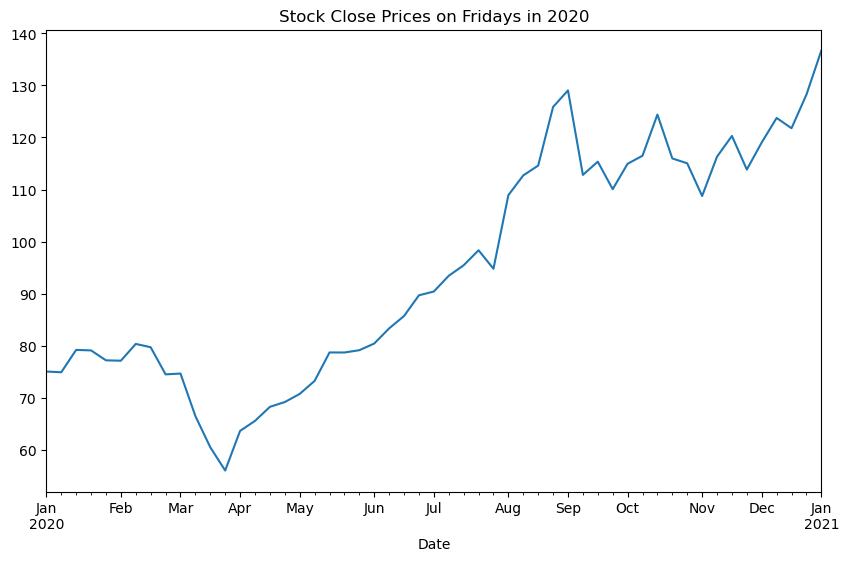

In [21]:
# use Pandas to plot the Close column of the reindexed data
stockDataFridays['Close'].plot(figsize=(10, 6), title='Stock Close Prices on Fridays in 2020')


## Resample the data

<Axes: title={'center': 'Monthly Stock Close Prices in 2020'}, xlabel='Date'>

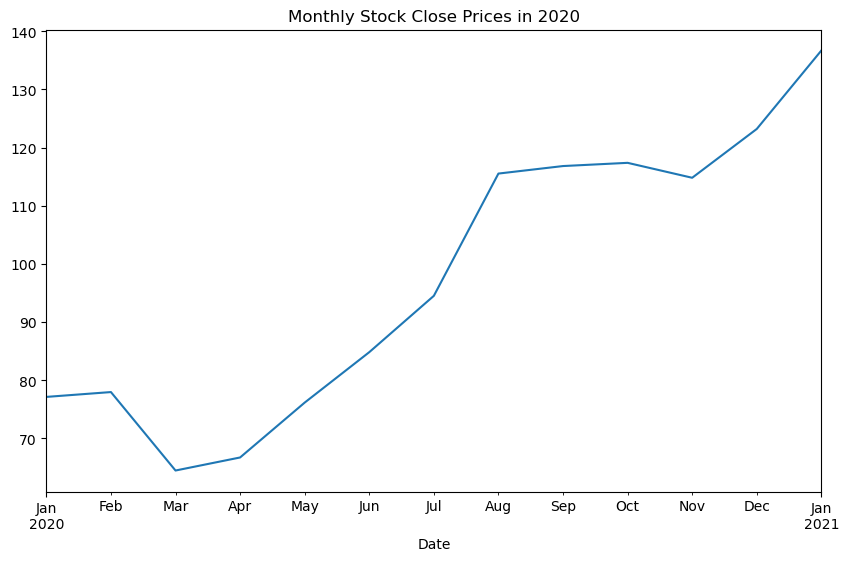

In [22]:
# downsample the data to a monthly frequency
# Downsample the data to monthly frequency
monthly_data = stockDataFridays.resample('M').mean()

# Plot the Close column of the downsampled data
monthly_data['Close'].plot(figsize=(10, 6), title='Monthly Stock Close Prices in 2020')


<Axes: title={'center': 'Resampled Stock Close Prices in 2020'}, xlabel='Date'>

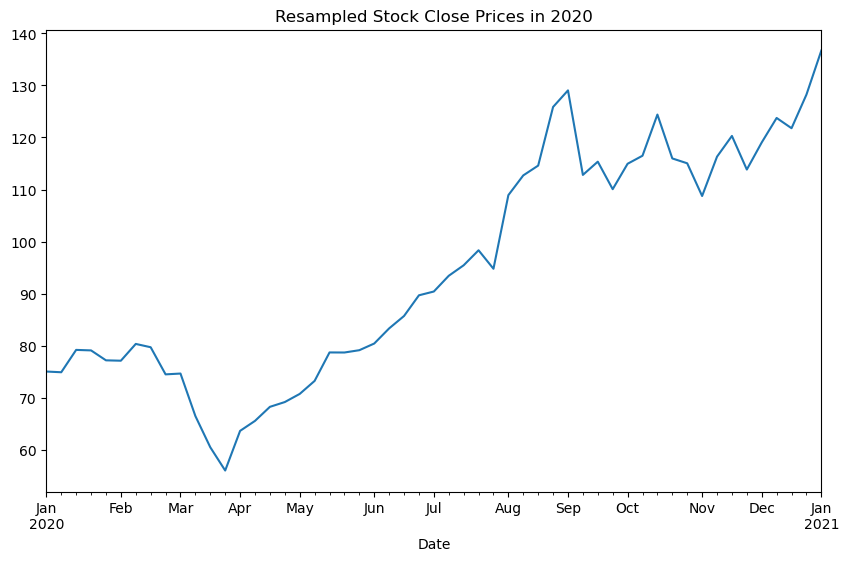

In [23]:
# use Pandas to plot the Close column of the resampled data
# Plot the Close column of the resampled data
stockDataFridays['Close'].plot(figsize=(10, 6), title='Resampled Stock Close Prices in 2020')


## Compute a rolling window

In [26]:
# compute a 2 week rolling average for the Close column
# set the min_periods to 1 and assign the data to a variable called stocksRolling
# Compute a 2-week rolling average for the Close column
# Compute a 2-week rolling average for the Close column
stocksRolling = stockDataFridays['Close'].rolling(window='14D', min_periods=1).mean()
stocksRolling

Date
2020-01-03     75.087502
2020-01-10     75.018749
2020-01-17     77.094998
2020-01-24     79.191250
2020-01-31     78.190003
2020-02-07     77.201252
2020-02-14     78.776249
2020-02-21     80.068748
2020-02-28     77.147499
2020-03-06     74.623749
2020-03-13     70.622501
2020-03-20     63.547503
2020-03-27     58.322501
2020-04-03     59.897499
2020-04-10     64.659999
2020-04-17     66.965000
2020-04-24     68.772499
2020-05-01     70.012500
2020-05-08     72.041252
2020-05-15     76.021252
2020-05-22     78.746250
2020-05-29     78.961251
2020-06-05     79.822502
2020-06-12     81.913750
2020-06-19     84.556248
2020-06-26     87.732498
2020-07-03     90.081249
2020-07-10     91.953751
2020-07-17     94.470001
2020-07-24     96.917499
2020-07-31     96.583748
2020-08-07    101.873749
2020-08-14    110.832501
2020-08-21    113.667499
2020-08-28    120.232498
2020-09-04    127.448745
2020-09-11    120.929996
2020-09-18    114.090001
2020-09-25    112.720001
2020-10-02    112.52

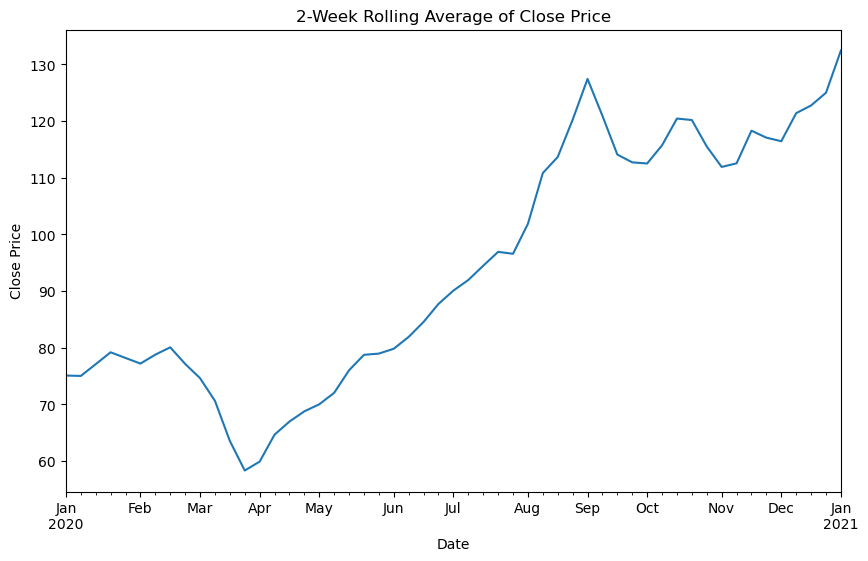

In [31]:
# use Pandas to plot the Close column of the rolling data
# Use Pandas to plot the Close column of the rolling data
stocksRolling.plot(figsize=(10, 6), xlabel='Date', ylabel='Close Price', title='2-Week Rolling Average of Close Price')
plt.show()
